# 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import spacy
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string

In [3]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, LSTM, Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

2024-12-22 23:21:45.612553: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-22 23:21:45.617905: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-22 23:21:45.630217: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-22 23:21:45.650226: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-22 23:21:45.656121: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attemptin

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/xeon4/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/xeon4/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/xeon4/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
df=pd.read_csv("complaints.csv")

In [6]:
df.shape

(6980045, 18)

In [7]:
df.sample(10)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
2159266,2024-04-24,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,I have already sent a letter addressing the in...,NaN,Experian Information Solutions Inc.,VA,23602,NaN,Consent provided,Web,2024-04-24,In progress,Yes,NaN,8846634
285207,2018-01-04,Vehicle loan or lease,Loan,Struggling to pay your loan,Loan balance remaining after the vehicle is re...,I purchased a car from XXXX XXXX XXXX in XXXX ...,NaN,"Exeter Finance, LLC.",MD,21921,NaN,Consent provided,Web,2018-01-04,Closed with explanation,Yes,NaN,2771884
2963289,2024-04-28,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",TX,75115,NaN,Consent not provided,Web,2024-04-28,Closed with non-monetary relief,Yes,NaN,8876469
2444504,2024-06-27,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,NV,89178,NaN,Consent not provided,Web,2024-06-27,Closed with explanation,Yes,NaN,9361550
1256488,2024-09-10,Credit reporting or other personal consumer re...,Other personal consumer report,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",TX,77469,NaN,Consent not provided,Web,2024-09-10,Closed with non-monetary relief,Yes,NaN,10076753
3694346,2023-09-06,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",FL,33823,NaN,Consent not provided,Web,2023-09-06,Closed with non-monetary relief,Yes,NaN,7506977
5534208,2022-03-09,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",NY,11691,NaN,Consent not provided,Web,2022-03-09,Closed with explanation,Yes,NaN,5304214
2664299,2023-12-12,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,IN,46254,NaN,Consent not provided,Web,2023-12-12,Closed with explanation,Yes,NaN,7991470
473688,2013-07-02,Credit reporting,NaN,Incorrect information on credit report,Public record,NaN,NaN,Experian Information Solutions Inc.,VA,22314,Older American,NaN,Web,2013-07-02,Closed with non-monetary relief,Yes,No,448082
2630692,2023-08-27,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,95673,NaN,Consent not provided,Web,2023-08-27,Closed with non-monetary relief,Yes,NaN,7490038


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6980045 entries, 0 to 6980044
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 958.

In [9]:
# FOr checking if dataset contains any null values
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        757414
Consumer complaint narrative    4657117
Company public response         3534256
Company                               0
State                             49320
ZIP code                          30228
Tags                            6431900
Consumer consent provided?      1256324
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              6211735
Complaint ID                          0
dtype: int64

In [10]:
# Handle missing values by dropping rows with null complaint text or dispute status
df = df.dropna(subset=['Consumer complaint narrative', 'Consumer disputed?'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164011 entries, 6025 to 6979129
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 164011 non-null  object
 1   Product                       164011 non-null  object
 2   Sub-product                   111841 non-null  object
 3   Issue                         164011 non-null  object
 4   Sub-issue                     83034 non-null   object
 5   Consumer complaint narrative  164011 non-null  object
 6   Company public response       78122 non-null   object
 7   Company                       164011 non-null  object
 8   State                         163552 non-null  object
 9   ZIP code                      164011 non-null  object
 10  Tags                          26991 non-null   object
 11  Consumer consent provided?    164011 non-null  object
 12  Submitted via                 164011 non-null  object
 13  

In [12]:
# Clean the text data (you can use your custom text-cleaning function)
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = " ".join([word for word in text.split() if word.isalpha()])  # Remove non-alphabetic characters
    return text

df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(clean_text)


In [70]:
df.shape

(13460, 13)

In [13]:
import klib


In [14]:
# Converting the datatypes into appropriate datatypes
df = klib.convert_datatypes(df)

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 164011 entries, 6025 to 6979129
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Date received                 164011 non-null  category
 1   Product                       164011 non-null  category
 2   Sub-product                   111841 non-null  category
 3   Issue                         164011 non-null  category
 4   Sub-issue                     83034 non-null   category
 5   Consumer complaint narrative  164011 non-null  string  
 6   Company public response       78122 non-null   category
 7   Company                       164011 non-null  category
 8   State                         163552 non-null  category
 9   ZIP code                      164011 non-null  category
 10  Tags                          26991 non-null   category
 11  Consumer consent provided?    164011 non-null  category
 12  Submitted via                 1

In [16]:
columns_to_convert = [
    'Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
    'Consumer complaint narrative', 'Company public response','Company', 'State', 'ZIP code', 'Tags',
    'Consumer consent provided?', 'Submitted via', 'Date sent to company',
    'Company response to consumer', 'Timely response?'
]

# Convert specified columns to object
df[columns_to_convert] = df[columns_to_convert].astype(object)

In [17]:
df.shape


(164011, 18)

Handaling Missing Dataset

In [18]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [19]:
clean_df = df.drop(columns=['Consumer consent provided?','Complaint ID', 'Date sent to company',
                              'ZIP code','State','Date received','Sub-product','Consumer complaint narrative',
                              'Sub-issue'])
clean_df.dropna(inplace = True)

In [20]:
clean_df.isnull().sum()

Product                         0
Issue                           0
Company public response         0
Company                         0
Tags                            0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
dtype: int64

In [69]:
clean_df.shape
clean_df = clean_df.reset_index(drop=True)
df.shape

(13460, 13)

In [22]:
df = pd.DataFrame.copy(clean_df)

In [23]:
import concurrent.futures

In [24]:
stemmer = PorterStemmer()

def preprocess_text(text):
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

def parallel_preprocess(column):
    df[column] = df[column].apply(preprocess_text)

columns_to_preprocess = ['Product', 'Issue', 'Company public response', 'Company', 'Tags', 'Submitted via', 'Company response to consumer', 'Timely response?']
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(parallel_preprocess, columns_to_preprocess)

As we know Computer didn't understnd my language so we will first convert this into 0 & 1 vector

In [25]:
df['Consumer disputed?'] = df['Consumer disputed?'].apply(lambda x: 1 if x == 'Yes' else 0)

In [29]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/xeon4/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [30]:
df['Combined text'] = df['Product'].astype(str) + ' ' + df['Issue'].astype(str) + ' ' + df['Company public response'].astype(str) + ' ' + df['Company'].astype(str) + ' ' + df['Tags'].astype(str) + ' ' + df['Submitted via'].astype(str) + ' ' + df['Company response to consumer'].astype(str) + ' ' + df['Timely response?'].astype(str)

from nltk.tokenize import word_tokenize
df['Tokenized text'] = df['Combined text'].apply(word_tokenize)

In [31]:
w2v_model = Word2Vec(sentences = df['Tokenized text'], vector_size=100, window=5, min_count=1, sg=0)

In [32]:
word_embeddings = [w2v_model.wv[word] for word in df['Tokenized text']]

In [33]:
from gensim.models import Word2Vec

w2v_model.save("word2vec_model.bin")

In [41]:
Document_embeddings = [np.mean(embeddings, axis=0) if embeddings.any() else np.zeros(w2v_model.vector_size) for embeddings in word_embeddings]

In [42]:
df['Document embeddings'] = Document_embeddings

In [37]:
df.head(3)

,Product,Issue,Company public response,Company,Tags,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Combined text,Tokenized text,document_embeddings
0,Bank account or service,Deposits and withdrawals,Company chooses not to provide a public response,WELLS FARGO & COMPANY,Older American,Web,Closed with non-monetary relief,Yes,0,Bank account or service Deposits and withdrawa...,"[Bank, account, or, service, Deposits, and, wi...","[0.26031804, -1.1232015, 0.1409213, 0.02793352..."
1,Student loan,Dealing with my lender or servicer,Company believes complaint caused principally ...,NAVY FEDERAL CREDIT UNION,Servicemember,Web,Closed with explanation,Yes,0,Student loan Dealing with my lender or service...,"[Student, loan, Dealing, with, my, lender, or,...","[-0.15049005, 0.2068432, -0.28335926, 0.101752..."
2,Bank account or service,"Account opening, closing, or management",Company has responded to the consumer and the ...,"CITIBANK, N.A.",Older American,Web,Closed with explanation,Yes,0,"Bank account or service Account opening, closi...","[Bank, account, or, service, Account, opening,...","[0.2273119, -1.2902328, -0.5593769, -0.0538548..."


In [43]:
len(df['Document embeddings'][0])

100

In [44]:
X = df['Document embeddings']
y = df['Consumer disputed?']
X = np.array(X)
y = np.array(y)

In [45]:
X.shape,y.shape

((13460,), (13460,))

In [46]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X.reshape(-1, 1), y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [47]:
X_train = np.array(X_train.tolist())
X_test = np.array(X_test.tolist())
X_train.shape, X_test.shape

((17110, 1, 100), (4278, 1, 100))

In [48]:
train_class_distribution = np.bincount(y_train)
test_class_distribution = np.bincount(y_test)

print(f"Train Class Distribution: {train_class_distribution}")
print(f"Test Class Distribution: {test_class_distribution}")

Train Class Distribution: [8557 8553]
Test Class Distribution: [2137 2141]


In [49]:
X_train = X_train.reshape(X_train.shape[0], 100, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 1)

In [50]:
early_stopping = EarlyStopping(monitor = 'accuracy' , patience = 1  ,restore_best_weights = True )
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(32))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model_hist= model.fit(X_train, y_train, epochs=10, batch_size=32,
                      validation_data=(X_test, y_test),verbose=1,callbacks=[early_stopping])

Epoch 1/10


2024-12-23 03:13:55.347562: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/xeon4/abhishek/analysis/myenv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


535/535 ━━━━━━━━━━━━━━━━━━━━ 59s 107ms/step - accuracy: 0.5049 - loss: 0.6936 - val_accuracy: 0.5262 - val_loss: 0.6927
Epoch 2/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 60s 113ms/step - accuracy: 0.5124 - loss: 0.6930 - val_accuracy: 0.5161 - val_loss: 0.6928
Epoch 3/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 59s 110ms/step - accuracy: 0.5086 - loss: 0.6929 - val_accuracy: 0.5014 - val_loss: 0.6928
Epoch 4/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 59s 110ms/step - accuracy: 0.5085 - loss: 0.6931 - val_accuracy: 0.5005 - val_loss: 0.6928
Epoch 5/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 58s 108ms/step - accuracy: 0.5167 - loss: 0.6929 - val_accuracy: 0.5414 - val_loss: 0.6924
Epoch 6/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 60s 113ms/step - accuracy: 0.5099 - loss: 0.6929 - val_accuracy: 0.5507 - val_loss: 0.6910
Epoch 7/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 61s 113ms/step - accuracy: 0.5242 - loss: 0.6917 - val_accuracy: 0.5330 - val_loss: 0.6908
Epoch 8/10
535/535 ━━━━━━━━━━━━━━━━━━━━ 60s 112ms/step - accuracy: 0.5328 - loss: 0.6901 - val

In [52]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report

y_pred = np.argmax(y_pred, axis=1)
y_pred = (y_pred > 0.2).astype('int32')
classification_rep = classification_report(y_test, y_pred)

print(classification_rep)

134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2137
           1       0.00      0.00      0.00      2141

    accuracy                           0.50      4278
   macro avg       0.25      0.50      0.33      4278
weighted avg       0.25      0.50      0.33      4278



/home/xeon4/abhishek/analysis/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/xeon4/abhishek/analysis/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/xeon4/abhishek/analysis/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [53]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report

y_pred = np.argmax(y_pred, axis=1)
y_pred = (y_pred > 0.75).astype('int32')
classification_rep = classification_report(y_test, y_pred)

print(classification_rep)

134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2137
           1       0.00      0.00      0.00      2141

    accuracy                           0.50      4278
   macro avg       0.25      0.50      0.33      4278
weighted avg       0.25      0.50      0.33      4278



/home/xeon4/abhishek/analysis/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/xeon4/abhishek/analysis/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/xeon4/abhishek/analysis/myenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

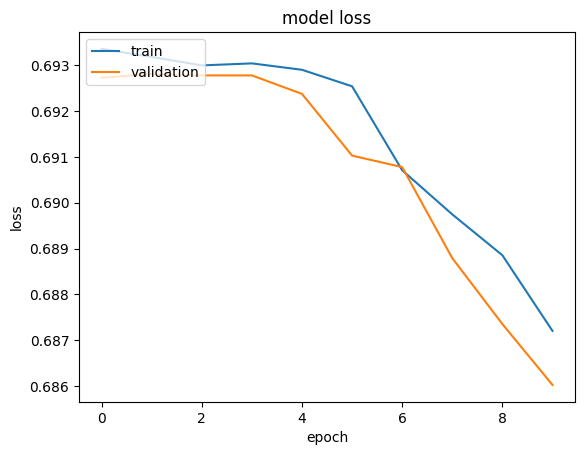

In [54]:
plt.plot(Model_hist.history['loss'])
plt.plot(Model_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

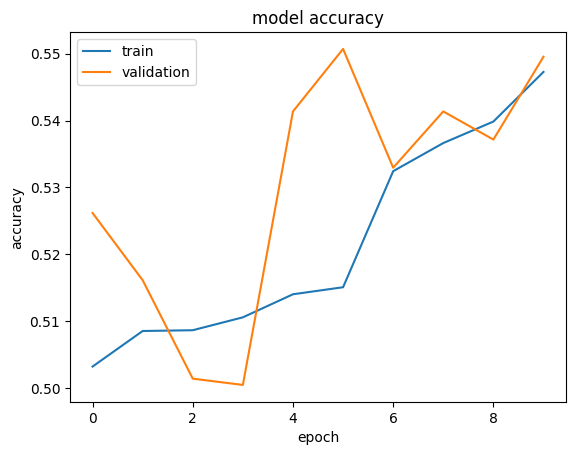

In [55]:
plt.plot(Model_hist.history['accuracy'])
plt.plot(Model_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [56]:
model.save('lstm_model.h5')

In [57]:
from tensorflow.keras.models import load_model

loaded_model = load_model('lstm_model.h5')

In [58]:
w2v_model = Word2Vec.load("word2vec_model.bin")

In [59]:
example_text = "mortgag Loan servicing, payments, escrow account compani choos provid public respons bank america nation associ older american postal mail close explan ye"


tokenized_text = word_tokenize(example_text.lower())  # Convert to lowercase for consistency

word_embeddings_2 = [w2v_model.wv[word] for word in tokenized_text if word in w2v_model.wv]

In [60]:
document_embeddings_2 = [np.mean(embeddings, axis=0) if embeddings.any() else np.zeros(w2v_model.vector_size) for embeddings in word_embeddings_2]

In [61]:
import numpy as np

# Assuming 'example_text' is the text you want to convert
example_tokens = word_tokenize(example_text)

# Initialize an empty list to store word vectors
example_vectors = []

# Iterate through each token in the example text
for token in example_tokens:
    try:
        vector = w2v_model.wv[token]
        example_vectors.append(vector)
    except KeyError:
        # Handle the case where a token is not in the vocabulary
        pass

# If there are no vectors for any tokens, add a zero vector
if not example_vectors:
    example_vectors.append(np.zeros(w2v_model.vector_size))

# Calculate the mean of the word vectors
example_vector = np.mean(example_vectors, axis=0)

# 'example_vector' now contains the vector representation of the example text

In [62]:
vec = np.array(example_vector)

final_vec= np.expand_dims(vec, axis=-1)

In [63]:
final_vec.shape

(100, 1)

In [64]:
final_vec = vec.reshape((1, vec.shape[0],1))

In [65]:
pred = model.predict(final_vec)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [66]:
pred

array([[0.5640992]], dtype=float32)

In [67]:
pred_class = 'Yes'
if pred[0][0]<0.5:
    pred_class = 'Yes'
else:
    pred_class = 'No'

pred_class

'No'